# Jupyter Pipeline for Mouse Simulation

### Outputs Time Series Matrix, Time array and SCM vs FCM Spearson Correlation

In [2]:
# A copy of Basic Connectome Simulations, but edited to be nicer.
# Also added the final functionalities of Skeleton Pipeline

# First Import the packages.
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from scipy import stats
#matplotlib.style.use('ggplot')
import inspect
import os

INFO  log level set to INFO


## Main adjustments below, can hopefully get away with only changing cell below!

In [3]:
# Main adjustments here:

# Name of import file/zip - Which contains connectivity data.
name = "MouseCortex"

# Monitors or not?  (Aka BOLD or not?)
BOLD = True

# Snip is the the number of elements you wish to snip at the start to remove the initial condition effects.
Snip = 10
# Note, if BOLD = False, Snip gets multiplied by 1000. 
if BOLD == False:
    Snip = 1000 * Snip

# Set the Random State/Seed for the Stochastic Integrator:
RandState = 118

# Define the model. 
MODEL = models.WilsonCowan(c_ee=12,c_ei=15,c_ie=10,c_ii=8) 

# models.WilsonCowan(c_ee=np.array([0,11,0,0,0]),c_ei=np.array([0,10,0,0,0]),c_ie=np.array([0,10,0,0,0]),c_ii=np.array([0,11,0,0,0]),b_e=2.5,b_i=3) 
# models.WilsonCowan(c_ee=np.arange(11,19,2),c_ei=10,c_ie=10,c_ii=1,b_e=2.5,b_i=3) 
# models.WilsonCowan(c_ee=np.arange(11,16,1)) 
# models.WilsonCowan()

#models.ReducedWongWang(w=1.0, I_o=0.3)
# models.ReducedWongWang(w=1.0, I_o=0.3)

#models.WilsonCowan(r_e=1.0,r_i=1.0,b_e=4.0,b_i=4.0,alpha_e=1.0,alpha_i=2.0,P=0)

In [56]:
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "MouseCortex"

# Monitors or not?  (Aka BOLD or not?)
ParamsDict["BOLD"] = True

# Snip is the the number of elements you wish to snip at the start to remove the initial condition effects.
ParamsDict["Snip"] = 10
# Note, if BOLD = False, Snip gets multiplied by 1000. 
if BOLD == False:
    ParamsDict["Snip"] = 1000 * ParamsDict["Snip"]

# Set the Random State/Seed for the Stochastic Integrator:
ParamsDict["RandState"] = 118

# Set Simulation Length:
ParamsDict["Simul_length"] = 1.2e5

# Set Linear Coupling Constant:
ParamsDict["G"] = 0.096

# Set integrator time step dt.
ParamsDict["dt"] = 0.1

# Set Additive Noise strength
ParamsDict["noise"] = 0.000013

# Set Wilson Cowan Model Parameters
ParamsDict["MODEL_c_ee"] = 12
ParamsDict["MODEL_c_ei"] = 15
ParamsDict["MODEL_c_ie"] = 10
ParamsDict["MODEL_c_ii"] = 8

# Define the model. 
ParamsDict["MODEL"] = models.WilsonCowan(c_ee=ParamsDict["MODEL_c_ee"],c_ei=ParamsDict["MODEL_c_ei"],c_ie=ParamsDict["MODEL_c_ie"] ,c_ii=ParamsDict["MODEL_c_ii"]) 

# models.WilsonCowan(c_ee=np.array([0,11,0,0,0]),c_ei=np.array([0,10,0,0,0]),c_ie=np.array([0,10,0,0,0]),c_ii=np.array([0,11,0,0,0]),b_e=2.5,b_i=3) 
# models.WilsonCowan(c_ee=np.arange(11,19,2),c_ei=10,c_ie=10,c_ii=1,b_e=2.5,b_i=3) 
# models.WilsonCowan(c_ee=np.arange(11,16,1)) 
# models.WilsonCowan()

# models.ReducedWongWang(w=1.0, I_o=0.3)
# models.ReducedWongWang(w=1.0, I_o=0.3)

#models.WilsonCowan(r_e=1.0,r_i=1.0,b_e=4.0,b_i=4.0,alpha_e=1.0,alpha_i=2.0,P=0)
for x,y in sorted(ParamsDict.items()):
  print x,y


BOLD True
G 0.096
MODEL WilsonCowan(bound=False, value=None)
MODEL_c_ee 12
MODEL_c_ei 15
MODEL_c_ie 10
MODEL_c_ii 8
RandState 118
Simul_length 120000.0
Snip 10
dt 0.1
name MouseCortex
noise 1.3e-05


In [44]:
# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"\\Connectomes\\" + ParamsDict["name"] + ".zip")


# Adjust our Giant 213 by 213 connectivity to just cortical areas which is 38 by 38. 
# No longer necessary.  MouseCortex file is just cortical areas with correct centres.  
# con.weights = con.weights[0:38,0:38]
# con.centres = con.centres[0:38,:]
# con.tract_lengths = con.tract_lengths[0:38,0:38]

# Mouse Allen Connectivity (from within TVB)
# con = connectivity.Connectivity.from_file("../mouse/allen_2mm/Connectivity.h5")

'''
if BOLD ==  True :
    
    name = name + "_BOLD"

else:
    name = name + "_nonBOLD"
'''

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


'\nif BOLD ==  True :\n    \n    name = name + "_BOLD"\n\nelse:\n    name = name + "_nonBOLD"\n'

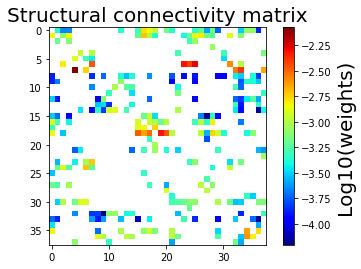

In [45]:
# Visualize the structural connectivity matrix
plt.subplots()
cs=plt.imshow(np.log10(con.weights), cmap='jet', aspect='equal', interpolation='none')
plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)
#plt.yticks([0,1,2,3])

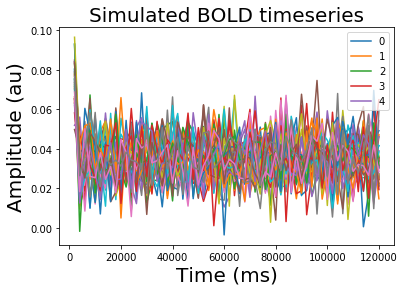

In [46]:
# Set the parameter of the resting state simulation

#numpy.random.seed(1028)
# Try a different random seed.

if BOLD == True:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.EulerStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            monitors=(monitors.Bold(period=2e3),
                                      monitors.TemporalAverage(period=1e3)),
                            simulation_length=ParamsDict["Simul_length"],
                            #initial_conditions=[1.8,1.8,1.8,1.8,1.8]
                            ).configure()
    # Run the resting state simulation
    (bold_time, bold_data), _ = sim.run()

    # Display the simulated bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated BOLD timeseries', fontsize=20)
    plt.legend(('0','1','2','3','4'))

# No Monitors 
else:

  sim = simulator.Simulator(model=ParamsDict["MODEL"],
                          connectivity=con,
                          coupling=coupling.Linear(a=ParamsDict["G"]),
                          integrator=integrators.EulerStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                          simulation_length=ParamsDict["Simul_length"]).configure()
  # Run the resting state simulation
  awer = sim.run()
  bold_time = awer[0][0]
  bold_data = awer[0][1]

  # Display the simulated non-bold timeseries
# Display the simulated non-bold timeseries
  plt.subplots()
  plt.plot(bold_time,bold_data[:,0,:,0])
  plt.xlabel('Time (ms)', fontsize=20)
  plt.ylabel('Amplitude (au)', fontsize=20)
  plt.title('Simulated non-BOLD timeseries', fontsize=20)
  plt.legend(('0','1','2','3','4'))

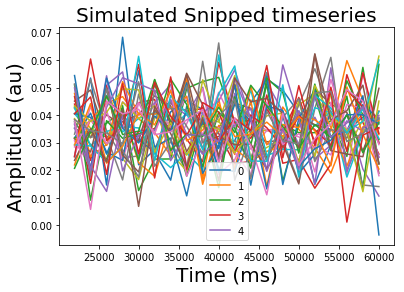

In [50]:
# Display the simulated snipped timeseries
plt.subplots()
plt.plot(bold_time[Snip:30],bold_data[Snip:30,0,:,0])
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated Snipped timeseries', fontsize=20)
plt.legend(('0','1','2','3','4'))

In [8]:
# Functional Connectivity Matrix. 

# We note that this is a static analysis.  More advanced version would be a DYnamic version with windowing.

# Convert Simulation output into a form usable by Numpy.
TSeriesMatrix = np.empty((bold_data.shape[2], bold_data.shape[0]-Snip))
#Matrix = []

for i in range(bold_data.shape[2]):
    TSeriesMatrix[i] = bold_data[Snip:,0,i].flatten()

# Functional Conenctivity MAtrix = Pearson Correlation.

FCM = np.corrcoef(TSeriesMatrix)
FCM

array([[ 1.        ,  0.13243479,  0.24655816, ...,  0.18746405,
        -0.16818515, -0.06611343],
       [ 0.13243479,  1.        ,  0.13129619, ..., -0.08383767,
         0.14007   ,  0.07474003],
       [ 0.24655816,  0.13129619,  1.        , ...,  0.05401151,
         0.2545932 ,  0.06880979],
       ...,
       [ 0.18746405, -0.08383767,  0.05401151, ...,  1.        ,
         0.08237415, -0.10338903],
       [-0.16818515,  0.14007   ,  0.2545932 , ...,  0.08237415,
         1.        ,  0.04070305],
       [-0.06611343,  0.07474003,  0.06880979, ..., -0.10338903,
         0.04070305,  1.        ]])

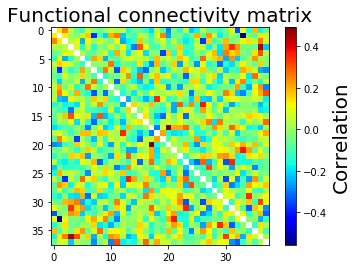

In [9]:
# Plot Matrix
# Set diagonals to NaN
FCM1 = FCM
np.fill_diagonal(FCM1,np.nan)

cs=plt.imshow(FCM1, cmap='jet', aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])

In [10]:
# Comparing SC Vs FC with Spearman Correlation

# Grab Upper triangles
FCM_Upper = FCM[np.triu_indices(FCM.shape[0], k = 1)]
SCM_Upper = con.weights[np.triu_indices(con.weights.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Upper,b=SCM_Upper)
SCorr

SpearmanrResult(correlation=-0.025353221308542274, pvalue=0.5021372872672138)

Text(0.05,0.95,u'SpearmanrResult(correlation=-0.025353221308542274, pvalue=0.5021372872672138)')

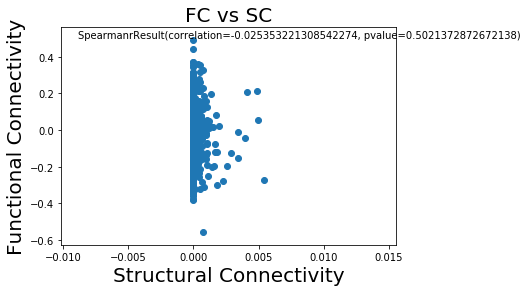

In [11]:
plt.scatter(SCM_Upper,FCM_Upper)
plt.xlabel('Structural Connectivity', fontsize=20)
plt.ylabel('Functional Connectivity', fontsize=20)
plt.title('FC vs SC', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')

In [12]:
# Export the simulation
np.savetxt("do-not-track\\" + name + "_TSM.csv", TSeriesMatrix, delimiter=",")
np.savetxt("do-not-track\\" + name + "_Time.csv", bold_time, delimiter = ",")
np.savetxt("do-not-track\\" + name + "_FCM.csv", FCM, delimiter = ",")
np.savetxt("do-not-track\\" + name + "_Scorr.csv", SCorr, delimiter = ",")